<h4 align="right">3rd of February 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 2 (part 1): TensorFlow</h2> <br>

In [0]:
import tensorflow as tf
import numpy as np









### TensorFlow basics

In [0]:
X = tf.constant(5)
Y = tf.constant(10)
S = tf.add(X,Y)
M = tf.multiply(X,Y)
Z = tf.subtract(M,S)

In [0]:
print(Z)

Tensor("Sub:0", shape=(), dtype=int32)


In [0]:
# sess = tf.Session
# print(sess.run(Z))
# sess.close()
with tf.Session() as sess:
    print(sess.run(Z))

35


In [0]:
# integrate with numpy and constants by converting numpy to constants
import numpy as np
X = tf.constant(5)
Y = tf.constant(10)
S = X + np.array(5)
M = Y * 10
Z = tf.subtract(M,S)
with tf.Session() as sess:
    print(sess.run(Z))

90


In [0]:
# broadcasting applies
X = tf.constant(5)
Y = tf.constant(10)
S = X + [1,1,1,1]
M = Y * [5,5,5,5]
Z = tf.subtract(M,S)
# can get tensor dims
print(S.get_shape().as_list())

with tf.Session() as sess:
    print(sess.run(Z))

[4]
[44 44 44 44]


In [0]:
# what if I need to feed data
tf.reset_default_graph()
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
S = tf.add(X,Y)
M = tf.multiply(X,Y)
Z = tf.subtract(M,S)
with tf.Session() as sess:
    print(sess.run(Z, feed_dict = {X:5,Y:10}))

35.0


In [0]:
a = tf.constant([2,2], name = 'a', dtype = tf.int32)
a = tf.zeros([2])
a = tf.zeros((2,), dtype = tf.int32)
b = tf.zeros_like(a)
a = tf.fill([2,2], 5)

In [0]:
with tf.Session() as sess:
  print(sess.run(a))
  print(sess.run(b))

[[5 5]
 [5 5]]
[0 0]


In [0]:
# a = np.array([10,10])
a = np.array([[10,10],[1,1]])
b = np.array([[2, 2],[2, 2]])
c = tf.matmul(a,b)
with tf.Session() as sess:
    print(sess.run(c))

[[40 40]
 [ 4  4]]


In [0]:
# a = np.array([10,10])
a = np.array([[10,10],[1,1]])
b = np.array([[2, 2],[2, 2]])
c = tf.cast(tf.matmul(a,b), dtype = tf.float32)
with tf.Session() as sess:
    print(sess.run(c))

[[40. 40.]
 [ 4.  4.]]


### Regression example on boston dataset

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [0]:
#q: where is the validation_dataset
boston = load_boston()
xtrain, xtest, ytrain, ytest = train_test_split(boston.data, boston.target.reshape(-1,1), test_size = 0.2, random_state = 1)
xtrain.shape

(404, 13)

In [0]:
def placeholders(nx,ny):
  X = tf.placeholder(tf.float32, shape=[None,nx])
  Y = tf.placeholder(tf.float32, shape=[None,ny])
  return X, Y
def init_weights():
  W = tf.get_variable("weights", shape = [13,1], initializer = tf.random_normal_initializer())
  b = tf.get_variable("bias", initializer = tf.constant(0.0))
  return {'W':W, 'b':b}
def forward(X, params):  #q:what is that represents ?
  W = params['W']
  b = params['b']
  Y = tf.add(tf.matmul(X,W),b)
  return Y
def cost(A, Y):
#   loss = tf.reduce_mean(tf.square(A - Y))
  loss = tf.losses.mean_squared_error(Y, A)
  return loss

In [0]:
# simple regression example
tf.reset_default_graph()
X, Y = placeholders(xtrain.shape[1], ytrain.shape[1])
parameters = init_weights()
preds = forward(X, parameters)
loss = cost(preds, Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
epochs = 10000
losses = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # initialize the variables in the tensorflow graph
for i in range(epochs):
#         _, loss = sess.run([optimizer, loss], feed_dict = {X:xtrain}) #beware of the loss variable
    _, loss_train, predictions = sess.run([optimizer, loss, preds], feed_dict = {X : xtrain, Y : ytrain})
    losses.append(loss_train)
    if i % 10 == 0:
        print(i, loss_train)

0 205307.27
10 58099.055
20 16958.793
30 5435.4585
40 2184.2637
50 1245.6359
60 955.43616
70 848.8
80 795.7092
90 759.655
100 730.25354
110 704.4324
120 681.17676
130 660.0604
140 640.8336
150 623.3095
160 607.3283
170 592.74805
180 579.4405
190 567.28955
200 556.18933
210 546.04425
220 536.7671
230 528.27856
240 520.507
250 513.38696
260 506.85907
270 500.86926
280 495.36874
290 490.31274
300 485.66104
310 481.37665
320 477.42627
330 473.7795
340 470.4089
350 467.2893
360 464.39783
370 461.71387
380 459.21863
390 456.8951
400 454.7276
410 452.70224
420 450.80603
430 449.02744
440 447.35577
450 445.78143
460 444.2958
470 442.8909
480 441.55936
490 440.29486
500 439.0914
510 437.94342
520 436.84595
530 435.79486
540 434.78592
550 433.81543
560 432.87973
570 431.97626
580 431.10202
590 430.2545
600 429.43143
610 428.6308
620 427.8506
630 427.08914
640 426.34494
650 425.6165
660 424.9026
670 424.20193
680 423.5136
690 422.83655
700 422.1699
710 421.51288
720 420.86478
730 420.22495
740 41

In [0]:
testpreds = sess.run(preds, feed_dict = {X:xtest})
loss_test = sess.run(loss, feed_dict = {Y:ytest, preds:testpreds})
print('train loss',loss_train,'\ntest loss',loss_test)

train loss 225.17946 
test loss 299.53122


<function matplotlib.pyplot.show>

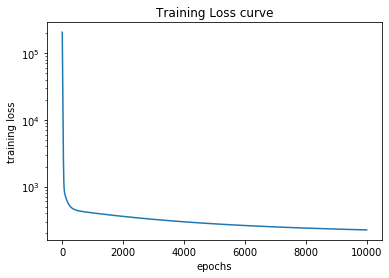

In [0]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.yscale('log')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('Training Loss curve')
plt.show

In [0]:
sess.close()

### Classification practice on iris dataset

#### Data preparation

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
iris = load_iris() 

In [2]:
iris.target.shape

(150,)

In [3]:
iris = load_iris()  # iris.data, iris.target
### To Be Done ### use sklearn OneHotEncoder to encode the data labels --- grade = 5% time = 5 min
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder(handle_unknown='ignore') 
  
labels = onehotencoder.fit_transform(iris.target.reshape(-1,1)).A

##################
# labels are the encoded iris.target
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, labels, test_size = 0.2, random_state = 1)
#ytrain_ori = enc.inverse_transform(ytrain)
#ytest_ori = enc.inverse_transform(ytest)
xtrain.shape
ytrain[1]

array([0., 0., 1.])

#### build model

In [0]:
### To be Done ### implement the four functions grade = 80% time = 1 hour
def placeholders(nx,ny):
  X = tf.placeholder(tf.float32, shape=[None,nx])
  Y = tf.placeholder(tf.float32, shape=[None,ny])
  return X, Y
def init_weights():
  ## For initializing the weights use xavier initializer. See here: https://docs.w3cub.com/tensorflow~python/tf/contrib/layers/xavier_initializer/
  ## For initializing the biases use zeros initializer. 
  W1 =  tf.get_variable("weights", shape = [4,4], initializer = tf.contrib.layers.xavier_initializer())   #q:why we have used such initialization
  b1 =  tf.get_variable("bias", initializer = tf.zeros((1,4)))      
  
  W2 =  tf.get_variable("weights2", shape = [4,3], initializer = tf.contrib.layers.xavier_initializer())   # q:I am asking if W2 are weights of second layer 
  b2 =  tf.get_variable("bias2", initializer = tf.zeros((1,3)))            
  return {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
def forward(X, params):
  W1 = params['W1']
  b1 = params['b1']
  Z1 = tf.add(tf.matmul(X,W1),b1)
  A1 = tf.nn.relu(Z1)                         ## Apply relu activation on the first layer output
  W2 = params['W2']
  b2 = params['b2']
  Z2 = tf.add(tf.matmul(A1,W2),b2)
  Y =  tf.nn.softmax(Z2)                        ## Apply softmax activation on the final predictions
  return Y
def cost(A, Y):      ### Calculate the loss using the appropriate loss function
  #loss = tf.losses.softmax_cross_entropy(A, Y)
  loss=tf.losses.mean_squared_error(A, Y)
  return loss
#########################################################
def predict(A):
  return tf.round(A)
def accuracy(A, Y):
  preds = predict(A)
  return tf.metrics.accuracy(Y, preds)

In [0]:
import tensorflow as tf
tf.reset_default_graph()
X, Y = placeholders(xtrain.shape[1], ytrain.shape[1])
parameters = init_weights()
preds_proba = forward(X, parameters)
loss = cost(preds_proba, Y)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
preds = predict(preds_proba)
acc = accuracy(preds_proba, Y)

In [69]:
epochs = 10000
losses = []
accuracy = []
sess = tf.Session()
sess.run(tf.local_variables_initializer())
sess.run(tf.global_variables_initializer())
for i in range(epochs):
      _, loss_train, acc_train, predictions = sess.run([optimizer, loss, acc, preds], feed_dict = {X : xtrain, Y : ytrain})
      losses.append(loss_train)
      accuracy.append(acc_train[0])
      if i % 100 == 0:
        print(i, loss_train, acc_train[0])

0 0.23776758 0.0
100 0.17311272 0.75691664
200 0.14539634 0.7673472
300 0.11075648 0.7991667
400 0.0881323 0.82090276
500 0.073475555 0.8370778
600 0.06015725 0.85825926
700 0.048811164 0.87528175
800 0.04002342 0.88809377
900 0.033585533 0.89805865
1000 0.02895352 0.90603054
1100 0.025601361 0.912553
1200 0.023132144 0.9179884
1300 0.021272497 0.92258763
1400 0.019839847 0.92652977
1500 0.018711874 0.9299463
1600 0.017805927 0.9329358
1700 0.017065266 0.9355768
1800 0.016450137 0.938196
1900 0.015932214 0.94057167
2000 0.015490651 0.94270974
2100 0.015110088 0.94464415
2200 0.01477894 0.9464028
2300 0.014488318 0.9480085
2400 0.0142312925 0.9494803
2500 0.0140023865 0.95083445
2600 0.013797185 0.9520844
2700 0.013612111 0.95324177
2800 0.013444225 0.9543165
2900 0.013291106 0.955317
3000 0.013150716 0.9562509
3100 0.013021341 0.95712453
3200 0.012901488 0.95794356
3300 0.012789931 0.95871294
3400 0.0126856165 0.95946324
3500 0.012587663 0.96030396
3600 0.012495308 0.961098
3700 0.0124

<function matplotlib.pyplot.show>

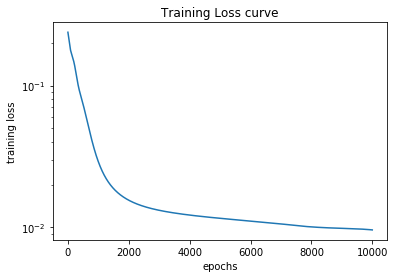

In [70]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.yscale('log')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('Training Loss curve')
plt.show

<function matplotlib.pyplot.show>

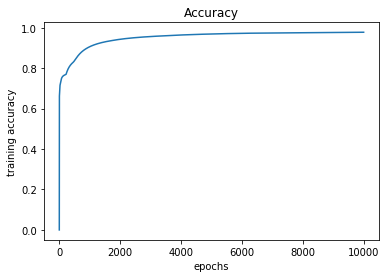

In [71]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('Accuracy')
plt.show

#### Validate

In [72]:
### To be Done ### get test accuracy grade = 15% time = 20 min

# here I am comparing testpreds with ytest , if they are different then an error happened and then accuracy=1-no of errors/total_number

testpreds = sess.run(preds, feed_dict = {X:xtest})
  
ytest.shape
testpreds.shape 
#####################################################################
count_errors=0
count_correct_predictions=0
for i in range(ytest.shape[0]):
    if(np.array_equal(ytest[i],testpreds[i])):
         count_correct_predictions=count_correct_predictions+1
    else:
         count_errors =count_errors +1 
       

acc_test=(1-(count_errors/ytest.shape[0]))*100
print('train accuracy',acc_train[0],'\ntest accuracy',acc_test)

train accuracy 0.97746444 
test accuracy 100.0


### multiple Graphs

In [15]:
# multiple graphs
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.constant(5)
    Y = tf.constant(10)
    S = tf.add(X,Y)
    M = tf.multiply(X,Y)
    Z = tf.subtract(M,S)
with tf.Session(graph = g) as sess:
    print(sess.run(Z))
g2 = tf.Graph()
with g2.as_default():
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)
    S = tf.add(X,Y)
    M = tf.multiply(X,Y)
    Z = tf.subtract(M,S)
with tf.Session(graph = g2) as sess:
    print(sess.run(Z, feed_dict = {X:5,Y:10}))

35
35.0
